In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# 1. Prepare the data

x_data = datasets.load_boston().data[:, 12]
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

C:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [5]:
# 2. Build the model

# (506, ) -> (506, 1)
_x_data = tf.reshape(x_data, [len(x_data), 1])

# hidden layer nodes: 5
W = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64))
W_out = tf.Variable(tf.random_normal([5, 1], dtype=tf.float64))

hidden = tf.nn.sigmoid(tf.matmul(_x_data, W))
# Regression
output = tf.matmul(hidden, W_out)

In [6]:
# 3. Set the critetion: Cost function & Gradient Descent method

# mse 값
loss = tf.reduce_mean(tf.square(output - y_data))
# set learning rate
optimizer = tf.train.GradientDescentOptimizer(0.001)
# loss와 optimizer연결
train = optimizer.minimize(loss)

In [10]:
# 4. Train the model

with tf.Session() as sess:
    # tf.Variables 초기화
    sess.run(tf.global_variables_initializer())
    
    # epoch, iteration = 50000
    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss: {}'.format(step, sess.run(loss)))
            print()
            
    output = sess.run(output)

Step 0 || Loss: 717.6431625430558

Step 5000 || Loss: 84.43406749085813

Step 10000 || Loss: 84.42934825614384

Step 15000 || Loss: 84.42698457591757

Step 20000 || Loss: 84.42554111005313

Step 25000 || Loss: 84.42456050403256

Step 30000 || Loss: 84.42384856415515

Step 35000 || Loss: 84.42330782714689

Step 40000 || Loss: 84.42288361655076

Step 45000 || Loss: 84.42254269308688



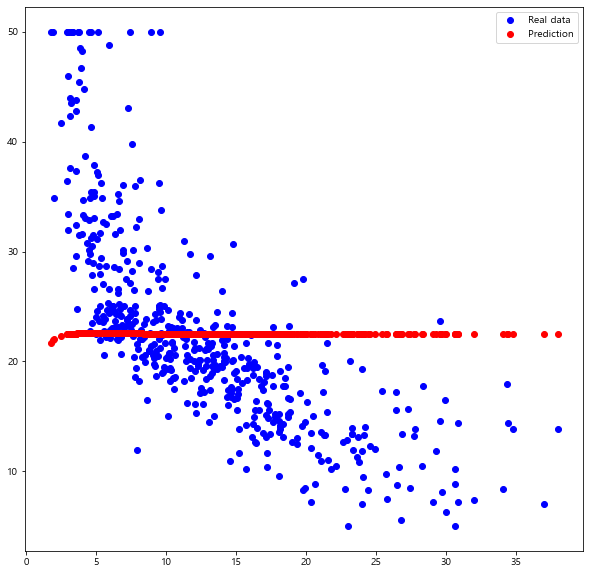

In [11]:
# 5. Visualize the result
## 제대로 학습되지 않았다.

plt.figure(figsize=(10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

In [ ]:
# 모델 build부터 다시 시작

In [17]:
# 2. Rebuild the model (2 Hidden layers)
## output:(506, 1) , y_data:(506,)
## y_data (506,) -> _y_data (506,1)

_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(y_data), 1])

W1 = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64))
W2 = tf.Variable(tf.random_normal([5, 10], dtype=tf.float64))
W_out = tf.Variable(tf.random_normal([10, 1], dtype=tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out)

In [18]:
# 3. Set the critetion: GradientDescent -> Adam

loss = tf.reduce_mean(tf.square(output - _y_data))
# set learning rate
optimizer = tf.train.AdamOptimizer(0.001)
# loss와 optimizer연결
train = optimizer.minimize(loss)

In [19]:
# 4. Train the model

with tf.Session() as sess:
    # tf.Variables 초기화
    sess.run(tf.global_variables_initializer())
    
    # epoch, iteration = 50000
    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss: {}'.format(step, sess.run(loss)))
            print()
            
    output = sess.run(output)

Step 0 || Loss: 3339.6277915690625

Step 5000 || Loss: 27.98673232711409

Step 10000 || Loss: 27.401003525902166

Step 15000 || Loss: 27.214427371323836

Step 20000 || Loss: 27.082475822710325

Step 25000 || Loss: 27.060373165102607

Step 30000 || Loss: 27.057472313571417

Step 35000 || Loss: 27.05689221251606

Step 40000 || Loss: 27.056669132804895

Step 45000 || Loss: 27.05652629720861



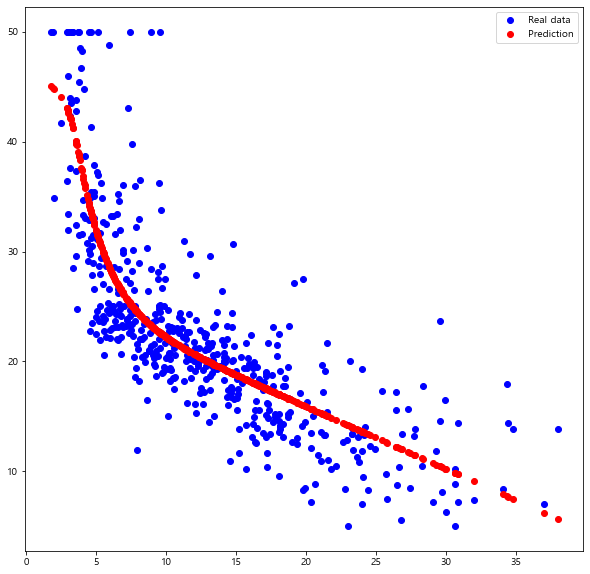

In [20]:
# 5. Visualize the result

plt.figure(figsize=(10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()